In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

Imported the dataset from kaggle

In [7]:
dataset = "https://www.kaggle.com/datasets/ikjotsingh221/obesity-risk-prediction-cleaned/data"

In [28]:
df  = pd.read_csv("/content/data.csv")

Data preprocessing and EDA

In [8]:
df.head()

,Height,Weight,family_history_with_overweight,SCC,MTRANS_Walking,FAVC_z,FCVC_minmax,NCP_z,CAEC_minmax,CH2O_minmax,FAF_minmax,TUE_z,CALC_z,Age_bin_minmax,NObeyesdad
0,1.62,64.0,1,0,0,2.766876,0.5,0.404704,0.333333,0.5,0.000000,0.550985,1.439033,0.25,1
1,1.52,56.0,1,1,0,2.766876,1.0,0.404704,0.333333,1.0,1.000000,1.092724,0.516552,0.25,1
2,1.80,77.0,1,0,0,2.766876,0.5,0.404704,0.333333,0.5,0.666667,0.550985,2.472136,0.50,1
3,1.80,87.0,0,0,1,2.766876,1.0,0.404704,0.333333,0.5,0.666667,1.092724,2.472136,0.75,2
4,1.78,89.8,0,0,0,2.766876,0.5,2.164116,0.333333,0.5,0.000000,1.092724,0.516552,0.50,3


In [45]:
df.shape

(2086, 15)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2086 entries, 0 to 2085
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Height                          2086 non-null   float64
 1   Weight                          2086 non-null   float64
 2   family_history_with_overweight  2086 non-null   int64  
 3   SCC                             2086 non-null   int64  
 4   MTRANS_Walking                  2086 non-null   int64  
 5   FAVC_z                          2086 non-null   float64
 6   FCVC_minmax                     2086 non-null   float64
 7   NCP_z                           2086 non-null   float64
 8   CAEC_minmax                     2086 non-null   float64
 9   CH2O_minmax                     2086 non-null   float64
 10  FAF_minmax                      2086 non-null   float64
 11  TUE_z                           2086 non-null   float64
 12  CALC_z                          20

<Axes: >

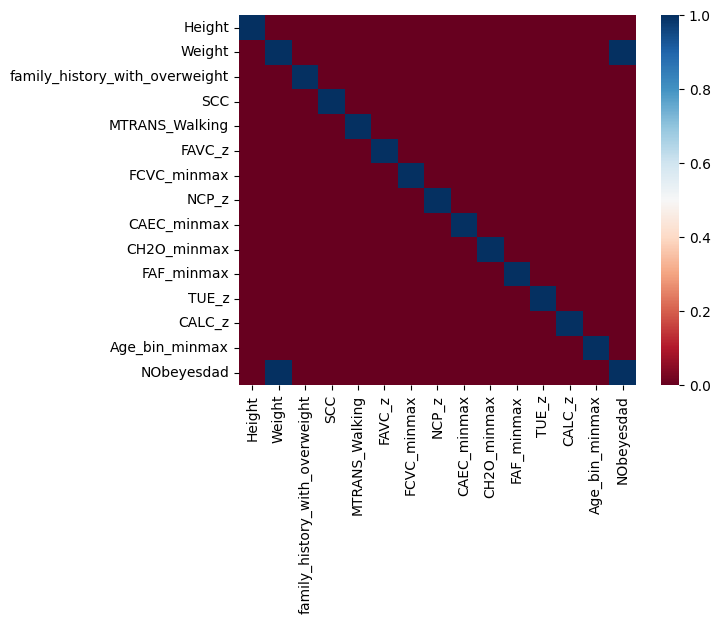

In [32]:
sns.heatmap(df.corr() > 0.7, cmap = "RdBu")

<Axes: >

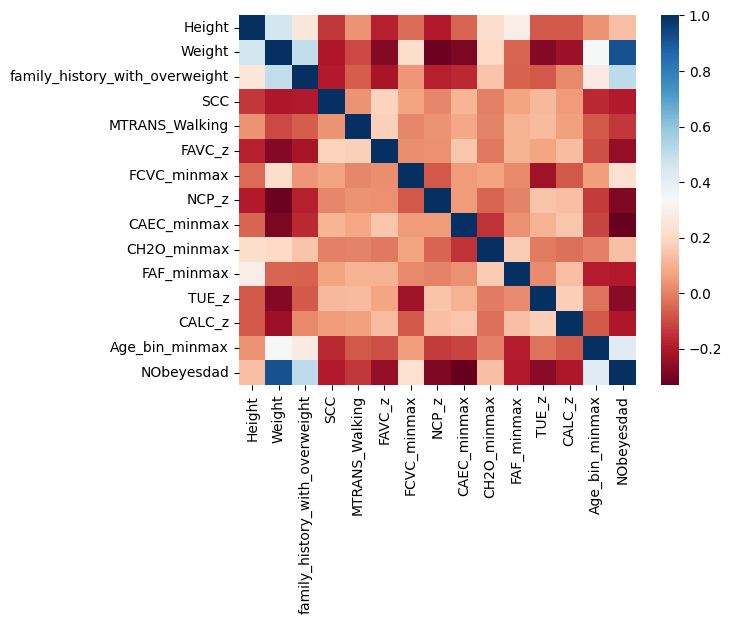

In [14]:
sns.heatmap(df.corr(), cmap = "RdBu")

In [37]:
df.isnull().sum().sum()

0

In [38]:
df.columns

Index(['Height', 'Weight', 'family_history_with_overweight', 'SCC',
       'MTRANS_Walking', 'FAVC_z', 'FCVC_minmax', 'NCP_z', 'CAEC_minmax',
       'CH2O_minmax', 'FAF_minmax', 'TUE_z', 'CALC_z', 'Age_bin_minmax',
       'NObeyesdad'],
      dtype='object')

In [40]:
df["NObeyesdad"].value_counts()

,count
NObeyesdad,
4,342
6,323
5,297
2,289
1,285
3,278
0,272


In [44]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Height,2086.0,1.702045,0.093419,1.450000,1.630000,1.701383,1.768770,1.980000
Weight,2086.0,86.622985,26.256245,39.000000,65.130595,83.000000,108.009452,165.057269
family_history_with_overweight,2086.0,0.817354,0.386469,0.000000,1.000000,1.000000,1.000000,1.000000
SCC,2086.0,0.045062,0.207491,0.000000,0.000000,0.000000,0.000000,1.000000
MTRANS_Walking,2086.0,0.026366,0.160260,0.000000,0.000000,0.000000,0.000000,1.000000
FAVC_z,2086.0,0.639326,0.769120,0.361418,0.361418,0.361418,0.361418,2.766876
FCVC_minmax,2086.0,0.709818,0.267493,0.000000,0.500000,0.695087,1.000000,1.000000
NCP_z,2086.0,0.763670,0.645761,0.002375,0.404704,0.404704,1.031717,2.164116
CAEC_minmax,2086.0,0.379834,0.155956,0.000000,0.333333,0.333333,0.333333,1.000000
CH2O_minmax,2086.0,0.504361,0.306578,0.000000,0.291005,0.500000,0.740243,1.000000


In [46]:
from sklearn.model_selection import train_test_split

In [49]:
X = df.drop(columns = ["NObeyesdad"])
y = df["NObeyesdad"]

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [51]:
len(X_train), len(X_test), len(y_train), len(y_test)

(1668, 418, 1668, 418)

Experimenting with single weak classifier

In [61]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [122]:
weak_classifier = DecisionTreeClassifier(max_depth=5)

In [123]:
weak_classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [124]:
print(f"Training accuracy :: {accuracy_score(y_train, weak_classifier.predict(X_train))}")
print(f"Test accuracy     :: {accuracy_score(y_test, weak_classifier.predict(X_test))}")

Training accuracy :: 0.8501199040767387
Test accuracy     :: 0.8181818181818182


Experimenting the weak classifier with AdaBoost endemble model

In [125]:
from sklearn.ensemble import AdaBoostClassifier

In [129]:
ensemble = AdaBoostClassifier(base_estimator=weak_classifier, n_estimators=50, random_state=42)

In [130]:
ensemble.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=5),
                   random_state=42)

In [131]:
print(f"Training accuracy :: {accuracy_score(y_train, ensemble.predict(X_train))}")
print(f"Test accuracy     :: {accuracy_score(y_test, ensemble.predict(X_test))}")

Training accuracy :: 0.9988009592326139
Test accuracy     :: 0.9593301435406698


Here we can see that esemble model performs far better than weak classifier